In [32]:
!pip install  -q easyocr transformers opencv-python matplotlib numpy

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


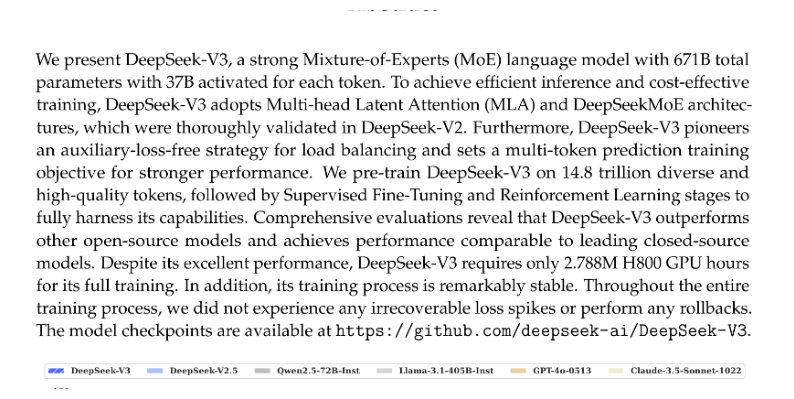


Extracted Text (English):
 We present DeepSeek-V3, a strong Mixture-of-Experts (MoE) language model with 671B total
parameters with 37B activated for each token: To achieve efficient inference and cost-effective
DeepSeek-V3 adopts Multi-head Latent Attention (MLA
and DeepSeekMoE architec-
tures, which
were
thoroughly validated in DeepSeek-V2. Furthermore, DeepSeek-V3 pioneers
an
auxiliary-loss-free strategy for load
balancing and sets a multi-token prediction
training
objective for stronger performance:
We pre-train DeepSeek-V3 on 14.8 trillion diverse and
high-quality tokens, followed by Supervised Fine-"
and Reinforcement Learning stages to
fully harness its
capabilities Comprehensive evaluations reveal that DeepSeek-V3 outperforms
other open-source models and achieves performance comparable to leading closed-source
models. Despite its excellent performance, DeepSeek-V3 requires only 2.788M HSOO GPU hours
for its full
In addition, its
process is remarkably stable: Throughout the ent

In [27]:
import easyocr
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from transformers import MarianMTModel, MarianTokenizer

# Function to extract text from an image using EasyOCR
def extract_text_easyocr(image_path):
    """Reads an image and extracts text using EasyOCR"""
    reader = easyocr.Reader(['en'])  # Load OCR model for English

    # Read and process the image
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Could not load image. Check the file path.")
        return None, None

    # Perform OCR
    results = reader.readtext(image)

    # Extract text and bounding boxes
    extracted_text = "\n".join([res[1] for res in results])
    return extracted_text, results

# Function to translate text from English to Spanish
def translate_en_to_es(text):
    """Translates English text to Spanish using a pre-trained model"""
    model_name = "Helsinki-NLP/opus-mt-en-es"
    tokenizer = MarianTokenizer.from_pretrained(model_name)
    model = MarianMTModel.from_pretrained(model_name)

    # Tokenize and translate
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    translated_tokens = model.generate(**inputs)
    translated_text = tokenizer.batch_decode(translated_tokens, skip_special_tokens=True)[0]

    return translated_text

# Function to display the image, extracted text, and translated text side-by-side
def display_three_columns(image_path, extracted_text, translated_text):
    """Displays the original image, extracted text, and translated text in three columns"""
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert for Matplotlib

    fig, axes = plt.subplots(1, 3, figsize=(20, 7))

    # Left: Show the original image
    axes[0].imshow(image)
    axes[0].set_title("Original Image")
    axes[0].axis("off")

    # Center: Show the extracted text
    axes[1].text(0.5, 0.5, extracted_text, fontsize=14, ha='center', va='center', wrap=True)
    axes[1].set_title("Extracted Text (English)")
    axes[1].axis("off")

    # Right: Show the translated text
    axes[2].text(0.5, 0.5, translated_text, fontsize=14, ha='center', va='center', wrap=True, color="red")
    axes[2].set_title("Translated Text (Spanish)")
    axes[2].axis("off")

    plt.show()

# Main Execution
image_path = "Text.png"  # Replace with your actual image file
extracted_text, _ = extract_text_easyocr(image_path)

if extracted_text:
    print("\nExtracted Text (English):\n", extracted_text)

    translated_text = translate_en_to_es(extracted_text)
    print("\nTranslated Text (Spanish):\n", translated_text)

    # Show the image + text in three columns
    display_three_columns(image_path, extracted_text, translated_text)
